In [ ]:
#Importing all the libraries
import tensorflow as tf
import keras
from keras.utils import np_utils
from keras.models import Sequential
from tensorflow.keras.utils import plot_model
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers import BatchNormalization,Activation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras import backend as K

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Unzip the dataset
!unzip drive/MyDrive/cell_images.zip


Streaming output truncated to the last 5000 lines.
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_87.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_91.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_1

In [ ]:
#Importing open source libraries.
import os
import cv2
from PIL import Image

In [ ]:
#To get list of all the files.
parasitized=os.listdir('cell_images/Parasitized')
uninfected=os.listdir('cell_images/Uninfected')

In [ ]:
#Creating a list for datasets, peeking into them and re-sizing considerable imanges. 
data=[]
labels=[]

#Performing operations on parasitized dataset.
for a in parasitized:
    try:
        image=cv2.imread("cell_images/Parasitized/"+a)
        image_from_array=Image.fromarray(image,'RGB')
        size_image=image_from_array.resize((45,45))
        data.append(np.array(size_image))
        labels.append(1)
    except AttributeError:
        print("")
  

In [ ]:
#Performing operations on uninfected dataset
for b in uninfected:
    try:
        image=cv2.imread("cell_images/Uninfected/"+b)
        image_from_array=Image.fromarray(image,'RGB')
        size_image=image_from_array.resize((45,45))
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("")

In [ ]:
#Creating arrays to store the data
cells = np.array(data)
labels = np.array(labels)

np.save('Cells' , cells)
np.save('Labels' , labels)

In [ ]:
#Used format method to append shapes into cells and labels.
print('Cells : {} | labels : {}'.format(cells.shape , labels.shape))

Cells : (27558, 45, 45, 3) | labels : (27558,)


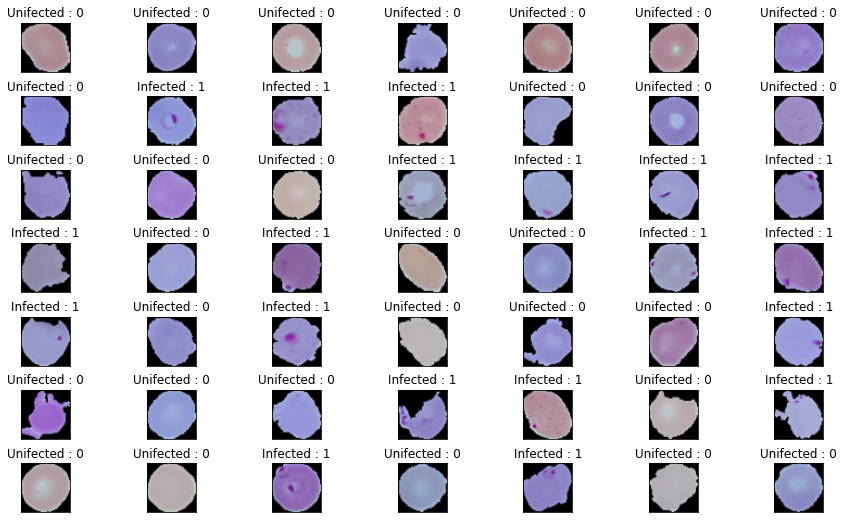

In [ ]:
#Plotting infected and uninfected cell images
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    r = np.random.randint(0 , cells.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(cells[r[0]])
    plt.title('{} : {}'.format('Infected' if labels[r[0]] == 1 else 'Unifected' ,
                               labels[r[0]]) )
    plt.xticks([]) , plt.yticks([])
    
plt.show()

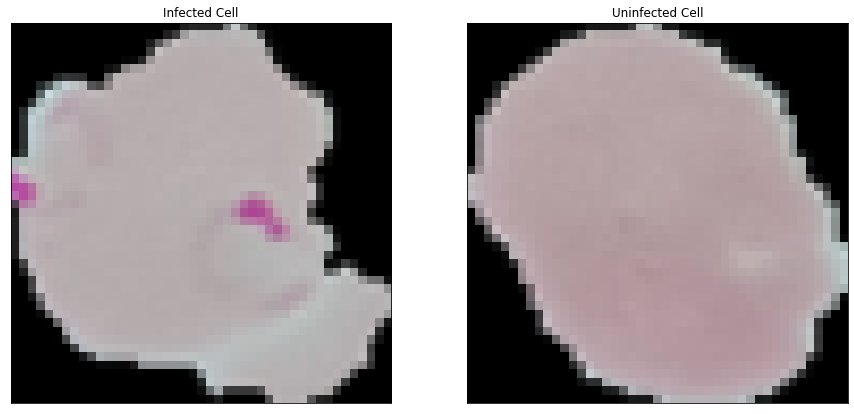

In [ ]:
#Plotting infected and uninfected cell images.
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cells[0])
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cells[14000])
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

In [ ]:
#Creating array with evenly spaced values.
n = np.arange(cells.shape[0])
np.random.shuffle(n)
cells = cells[n]
labels = labels[n]

In [ ]:
#Splitting the dataset into train and test
from sklearn.model_selection import train_test_split

train_x , x , train_y , y = train_test_split(cells , labels , 
                                            test_size = 0.2 ,
                                            random_state = 111)

eval_x , test_x , eval_y , test_y = train_test_split(x , y , 
                                                    test_size = 0.5 , 
                                                    random_state = 111)

In [ ]:
img_rows=45
img_cols=45
num_classes=2
epochs = 5
batch_size = 128

In [ ]:
if K.image_data_format() == 'channels_first':
    train_x = train_x.reshape(train_x.shape[0], 3, img_rows, img_cols)
    test_x = test_x.reshape(test_x.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    train_x = train_x.reshape(train_x.shape[0], img_rows, img_cols, 3)
    eval_x = eval_x.reshape(eval_x.shape[0], img_rows, img_cols, 3)
    test_x = test_x.reshape(test_x.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

In [ ]:
#Data pre-processing
#Conversion into float type
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')
eval_x=eval_x.astype('float32')

#Scaling the data.
train_x /= 255
test_x /= 255
eval_x/=255

#Printing the shapes of different samples
print('x_train shape:', train_x.shape)
print(train_x.shape[0], 'train samples')
print(test_x.shape[0], 'test samples')
print(eval_x.shape[0],'validation samples')

x_train shape: (22046, 45, 45, 3)
22046 train samples
2756 test samples
2756 validation samples


In [ ]:

test_y1=test_y
test_y1

array([0, 1, 1, ..., 0, 1, 1])

In [ ]:
# convert class vectors to binary class matrices
from keras.utils import np_utils
train_y = np_utils.to_categorical(train_y, 2)
test_y = np_utils.to_categorical(test_y, 2)
eval_y = np_utils.to_categorical(eval_y, 2)

In [ ]:
num_classes=len(np.unique(labels))
num_classes
train_y.shape
train_y[0]

array([1., 0.], dtype=float32)

In [ ]:
#Creating a sequential model
model = Sequential()

#Input layer
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(60,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Dropout(0.25))

#model.add(Conv2D(70,(5,5),activation='relu'))
#model.add(Dropout(0.3))

model.add(Conv2D(80, (5, 5), activation='relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(90,(5,5),activation='relu',padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(100,(5,5),activation='relu',padding='same'))

model.add(Dropout(0.25))
model.add(Conv2D(110,(5,5),activation='relu',padding='same'))


model.add(Dropout(0.25))
model.add(Conv2D(120,(5,5),activation='relu',padding='same'))

#Flattened layer to convert matrix data into vector.
model.add(Flatten())

#Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))

In [ ]:
#Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 41, 41, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 60)        48060     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 60)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 8, 8, 60)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 80)          1

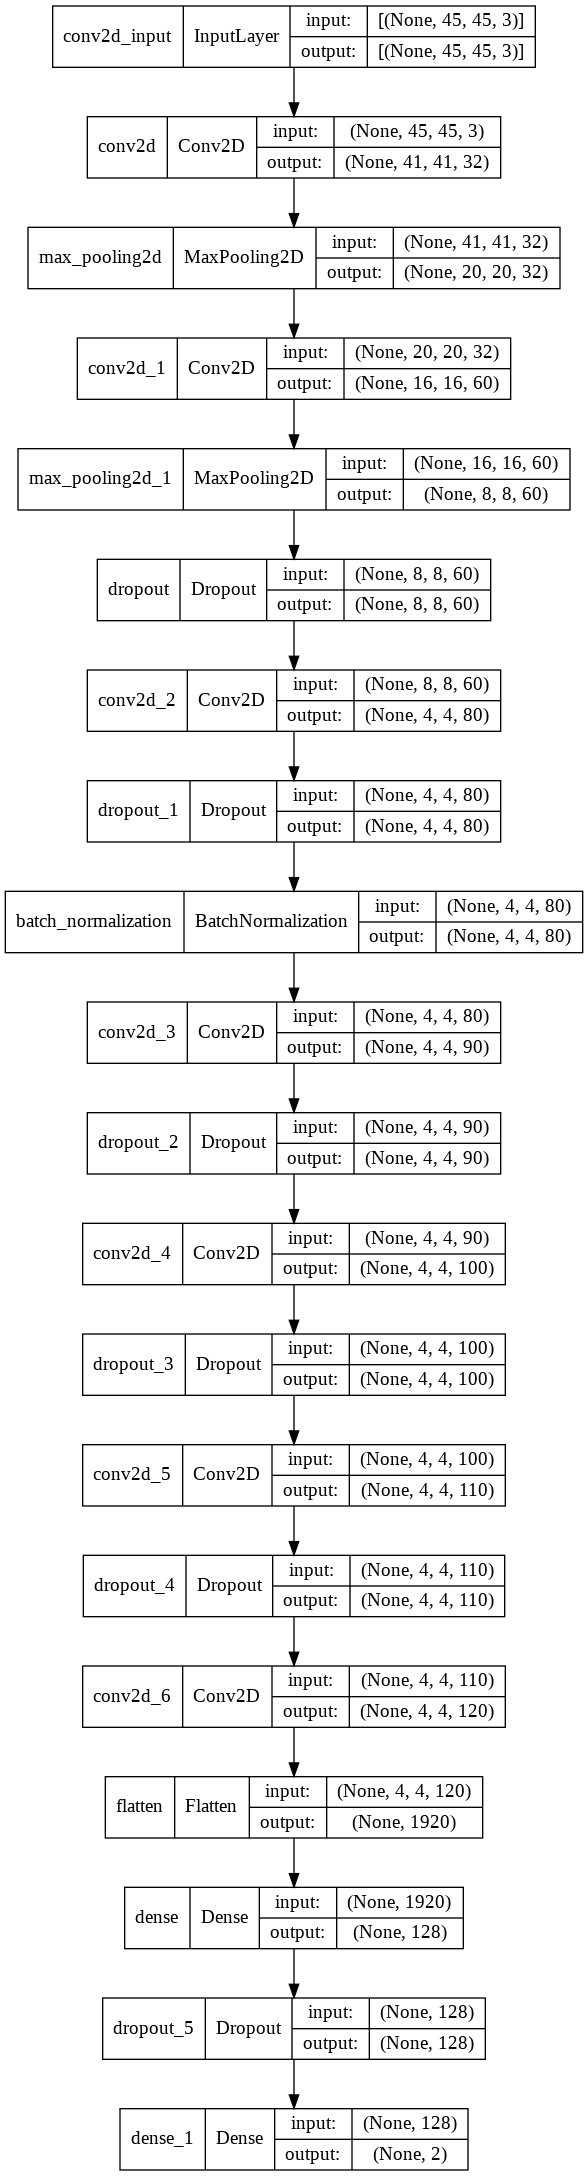

In [ ]:
#Plotting the model
plot_model(model,show_shapes=True,show_layer_names=True,to_file='cnn_model.png')

In [ ]:
#Implementing the callbacks to avoid overfitting
checkpoint_filepath = '/tmp/checkpoint'

model_checkpoint=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,monitor='val_accuracy',
    save_best_only=True,save_weights_only=True,
    mode='max')

#Configuring the model for training
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001),metrics=['accuracy'])

#To record each event in the history object.
history=model.fit(train_x, train_y,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,callbacks=[model_checkpoint],
          validation_data=(eval_x,eval_y))

Epoch 1/5
173/173 [==============================] - 240s 1s/step - loss: 0.6585 - accuracy: 0.6177 - val_loss: 0.8306 - val_accuracy: 0.4924
Epoch 2/5
173/173 [==============================] - 284s 2s/step - loss: 0.5778 - accuracy: 0.7126 - val_loss: 0.7395 - val_accuracy: 0.4808
Epoch 3/5
173/173 [==============================] - 244s 1s/step - loss: 0.3288 - accuracy: 0.8664 - val_loss: 0.2655 - val_accuracy: 0.9144
Epoch 4/5
173/173 [==============================] - 225s 1s/step - loss: 0.2136 - accuracy: 0.9247 - val_loss: 0.2155 - val_accuracy: 0.9329
Epoch 5/5
173/173 [==============================] - 199s 1s/step - loss: 0.1911 - accuracy: 0.9331 - val_loss: 0.1555 - val_accuracy: 0.9438


In [ ]:
#Evaluating the model and printing loss and accuracy results
score = model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.15000978112220764
Test accuracy: 0.944847583770752


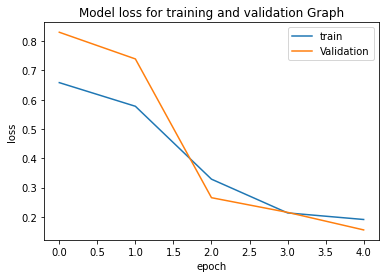

In [ ]:
# Loss Curves
#Plot the loss for training and validation in the same plot.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss for training and validation Graph')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','Validation'], loc='upper right')
plt.show()

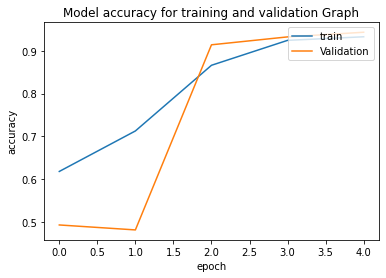

In [ ]:
# Accuracy Curves 
#Plot the accuracy for training and validation in the same plot.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy for training and validation Graph')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','Validation'], loc='upper right')
plt.show()


In [ ]:
 # creates a HDF5 file 'my_model.h5'
from keras.models import load_model
model.save('my_model.h5') 

In [ ]:
#Storing the data into h5 format.
model = load_model('my_model.h5')

In [ ]:
#Predicting the labels of data values on basis of training data
classes=model.predict(test_x,batch_size=128)

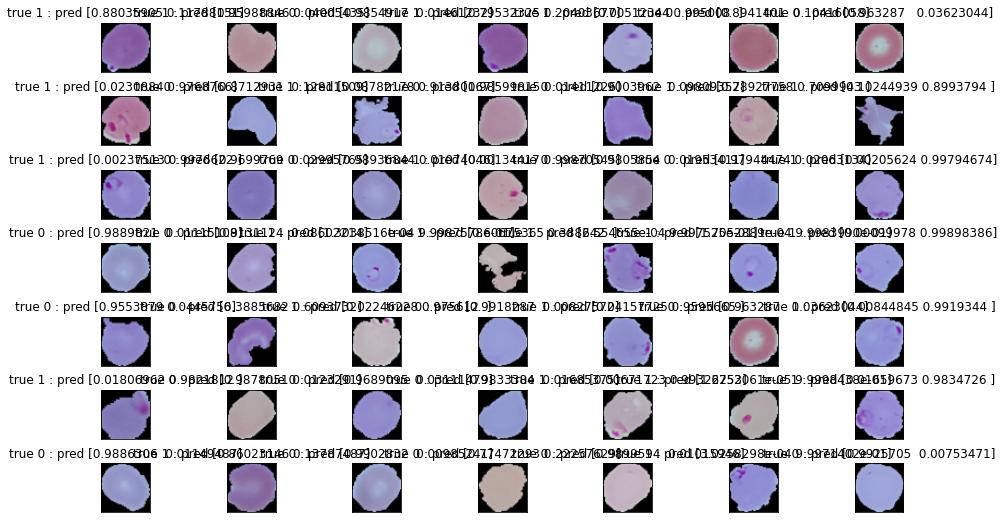

In [ ]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    r = np.random.randint( 0  , test_x.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(test_x[r[0]])
    plt.title('true {} : pred {}'.format(test_y1[r[0]] , classes[r[0]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()